#### First we import all our packages:

In [84]:
#things we need in order to import our data
import datetime
import pandas as pd
#math-stuff
import numpy as np
import matplotlib.pyplot as plt
#This is for enabling us to interact with plots
#import mpld3
#mpld3.enable_notebook()
%matplotlib notebook

#for plotting panda stuff
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#stat stuff
from scipy.stats import *

#### Then we need to download the data (EURUSD), which is in hdf5 format and convert to python. Here we also specify between which timepoints we collect data from:

In [2]:
hdf = pd.HDFStore(r'C:\Users\Karl\Downloads\20170101_20190101_EURUSD.h5', complib = 'zlib')
symbol = 'EURUSD'
start = pd.to_datetime('2018-01-02')
end = pd.to_datetime('2018-01-03')

ticks = hdf.select(symbol, where='index>="{}" & index<="{}"'.format(start, end))
ticks.info()
hdf.close()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 848522 entries, 2018-01-02 00:00:00.033000+00:00 to 2018-01-02 23:59:58.963000+00:00
Data columns (total 2 columns):
bid    848522 non-null float32
ask    848522 non-null float32
dtypes: float32(2)
memory usage: 12.9 MB


#### Now we want to check the data to see what the data looks like:

In [3]:
print(type(ticks))
ticks

<class 'pandas.core.frame.DataFrame'>


,bid,ask
date,,
2018-01-02 00:00:00.033000+00:00,1.20106,1.20110
2018-01-02 00:00:00.035000+00:00,1.20106,1.20109
2018-01-02 00:00:00.038000+00:00,1.20106,1.20110
2018-01-02 00:00:00.038000+00:00,1.20106,1.20110
2018-01-02 00:00:00.038000+00:00,1.20106,1.20109
...,...,...
2018-01-02 23:59:56.690000+00:00,1.20614,1.20618
2018-01-02 23:59:57.393000+00:00,1.20614,1.20618
2018-01-02 23:59:58.704000+00:00,1.20615,1.20618


### we want to extract more information this time, so we want columns of year, month, day, hour, minute, second, bid and ask

In [4]:
dataset = [ticks['bid'].values[0:len(ticks)], ticks['ask'].values[0:len(ticks)]]
timeset = [ticks.index[0:len(ticks)].year, ticks.index[0:len(ticks)].month, ticks.index[0:len(ticks)].day, 
           ticks.index[0:len(ticks)].hour, ticks.index[0:len(ticks)].second]

total_set = [ticks.index[0:len(ticks)].year, ticks.index[0:len(ticks)].month, 
             ticks.index[0:len(ticks)].day, ticks.index[0:len(ticks)].hour, ticks.index[0:len(ticks)].second, 
            ticks['bid'].values[0:len(ticks)], ticks['ask'].values[0:len(ticks)]]

## Method 1: k-means clustering

In [5]:
from sklearn.cluster import KMeans

In [6]:
#we change format so that it is in a format that the algorithms are based on
data =[]
for i in range(0,len(total_set[0])):
    data.append([total_set[0][i],total_set[1][i],total_set[2][i],total_set[3][i],total_set[4][i]
                ,total_set[5][i],total_set[6][i]])

In [7]:
#we let our clustering model operate on our dataset
Kmean = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=0.0001, 
               precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto').fit(data)
print(Kmean.labels_)
lb_kmean = Kmean.labels_

#centers = Kmean.cluster_centers_


[9 9 9 ... 1 1 1]


In [8]:
#which group is most prominent?
def ecount(vector,number):
    sum = 0
    for i in vector:
        if i == number:
            sum +=1
    return sum

nbr_ele = []
for i in set(lb_kmean):
    nbr_ele.append([ecount(lb_kmean,i)])
nbr_ele
#answer: 5

[[95445],
 [89797],
 [95493],
 [106321],
 [77286],
 [70541],
 [72839],
 [81740],
 [84691],
 [74369]]

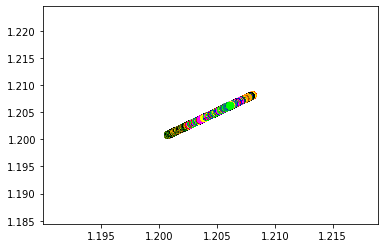

In [9]:
colormap = np.array(['red', 'lime', 'blue', 'yellow', 'black', 'green', 'orange', 'teal', 'magenta', 'olive'])
plt.scatter(dataset[0],dataset[1],c=colormap[lb_kmean], s=40)

## Method 2: DBscan

In [10]:
from sklearn.cluster import DBSCAN

In [12]:
%%time
clustering = DBSCAN(algorithm='auto', eps=0.0001, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=50, n_jobs=None, p=None).fit(data)
lb_DB = clustering.labels_
print(lb_DB)

[ 0  0  0 ... -1 -1 -1]
Wall time: 50.6 s


In [13]:
print(set(lb_DB))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

## Method 3: GMM (using expectation maximization technique)

In [14]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

print(np.mean(scaled_data), np.std(scaled_data))

2.791825220275901e-15 0.755928946019365


In [15]:
%%time
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=10)
lb_gmm = gmm.fit_predict(scaled_data)
set(lb_gmm)


Wall time: 49.3 s


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Plotting all the methods together:

Wall time: 6.05 s


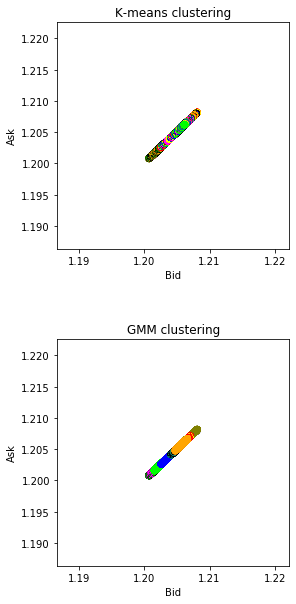

In [16]:
%%time
plt.figure(figsize=(10,10))
colormap = np.array(['red', 'lime', 'blue', 'yellow', 'black', 'green', 'orange', 'teal', 'magenta', 'olive'])

plt.subplot(2,2,1)
plt.scatter(dataset[0],dataset[1],c=colormap[lb_kmean], s=40)
plt.title('K-means clustering')
plt.xlabel('Bid')
plt.ylabel('Ask')


#plt.subplot(2,2,2)
#plt.scatter(dataset[0],dataset[1],c=colormap[lb_DB], s=40)
#plt.title('DBscan clustering')
#plt.xlabel('Bid')
#plt.ylabel('Ask')

plt.subplot(2,2,3)
plt.scatter(dataset[0],dataset[1],c=colormap[lb_gmm], s=40)
plt.title('GMM clustering')
plt.xlabel('Bid')
plt.ylabel('Ask')

plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)

## We see a very linear behaviour between ask and bid, however there appears to be patterns in when during the day the trade is made, should we perhaps make a new enrichment in the form of activity? How will this work since we are looking at activity on a minute basis

## Producing cross-correlation and variance plots

<IPython.core.display.Javascript object>


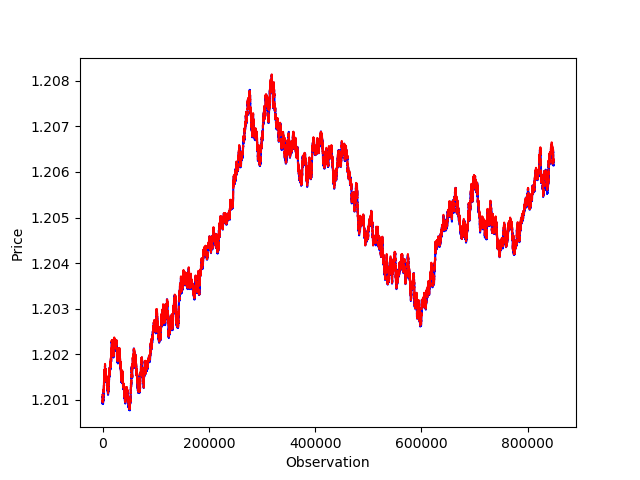

Text(0, 0.5, 'Price')

In [42]:
#First we taka a look at the time series
l = len(dataset[0])

bids = dataset[0]
asks = dataset[1]

plt.figure()
plt.plot(range(0,l),bids,c='b')
plt.plot(range(0,l),asks,c='r',ls='--')

plt.xlabel('Observation')
plt.ylabel('Price')

<IPython.core.display.Javascript object>


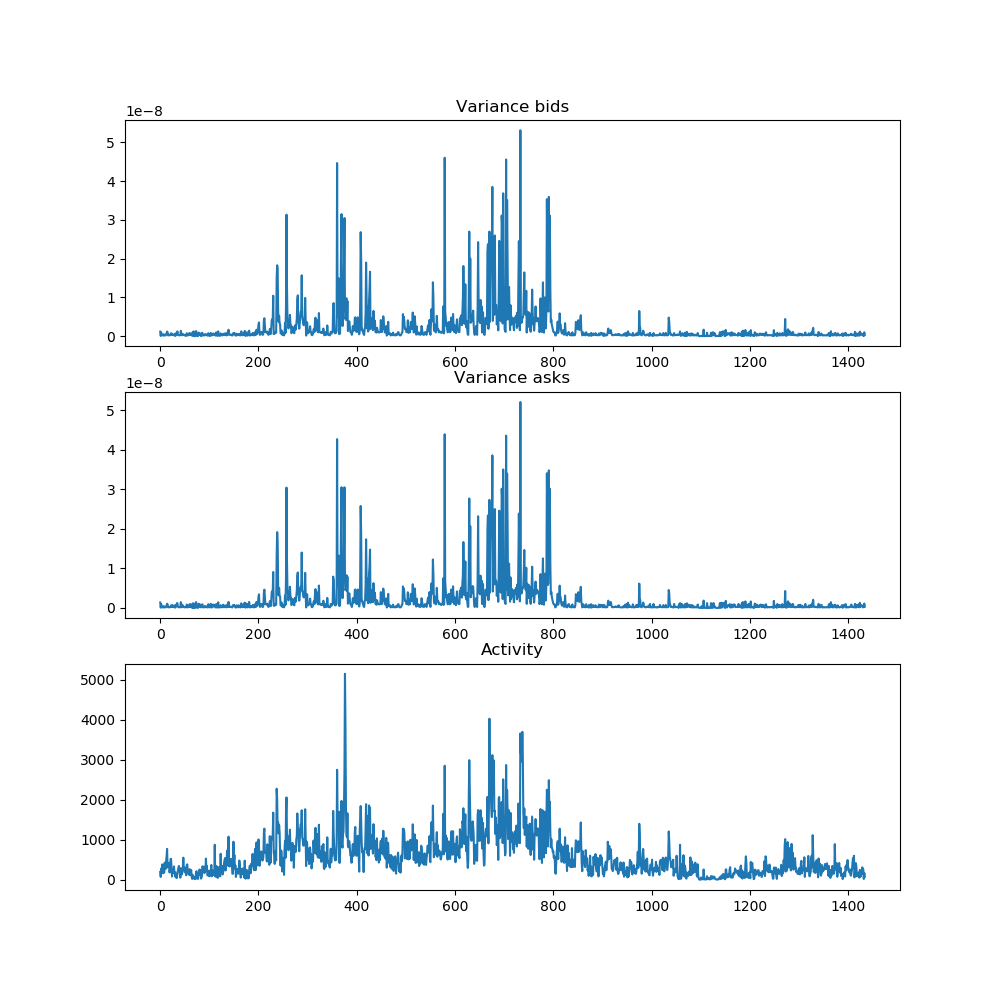

Wall time: 3.98 s


Text(0.5, 1.0, 'Activity')

In [71]:
%%time

#this cel produces activity per minute, variance for bid per minute and variance for ask per minute

timestamps = ticks.index[0:len(ticks)].values
rounded_timestamps = timestamps.astype('datetime64[m]')

#variance per minute
length = len(set(rounded_timestamps.astype('datetime64[m]')))
minute_trades = set(rounded_timestamps.astype('datetime64[m]'))

var_bids = np.zeros(length)
var_asks = np.zeros(length)
activity = np.zeros(length)

index = 0
start = 0
for i in minute_trades:
    stretch = np.count_nonzero(rounded_timestamps==i)
    activity[index] = stretch
    var_bids[index] = np.var(bids[start:start+stretch])
    var_asks[index] = np.var(asks[start:start+stretch])
    start = stretch+1
    index += 1

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(range(0,length),var_bids)
plt.title('Variance bids')

plt.subplot(3,1,2)
plt.plot(range(0,length),var_asks)
plt.title('Variance asks')

plt.subplot(3,1,3)
plt.plot(range(0,length),activity)
plt.title('Activity')

### Now cross correlation and correlation plots (on a minute basis)

In [90]:
%%time

# covariance matrices
covariance_bid_act = np.cov(var_bids,activity)
covariance_ask_act = np.cov(var_asks,activity)
# Pearson’s Correlation
corr_pear_bid_act,_ = stats.pearsonr(var_bids, activity)
corr_pear_ask_act,_ = stats.pearsonr(var_asks, activity)
# Spearman’s Correlation
corr_spear_bid_act,_ = stats.spearmanr(var_bids, activity)
corr_spear_ask_act,_ = stats.spearmanr(var_asks, activity)

print('#'*10 + ' Covariances ' + '#'*10 + '\n' +
     'bid-activity ' + str(covariance_bid_act) + '\n' + 
     'ask-activity ' + str(covariance_ask_act) + '\n')
print('#'*10 + ' Pearson correlations ' + '#'*10 + '\n' +
     'bid-activity ' + str(corr_pear_bid_act) + '\n' +
     'ask-activity ' + str(corr_pear_ask_act) + '\n')
print('#'*10 + ' Spearman correlations ' + '#'*10 + '\n' +
     'bid-activity ' + str(corr_spear_bid_act) + '\n' +
     'ask-activity ' + str(corr_spear_ask_act) + '\n')

########## Covariances ##########
bid-activity [[2.59117893e-17 2.08312861e-06]
 [2.08312861e-06 2.96314219e+05]]
ask-activity [[2.41059225e-17 2.00241078e-06]
 [2.00241078e-06 2.96314219e+05]]

########## Pearson correlations ##########
bid-activity 0.7517806368473946
ask-activity 0.7492298113136568

########## Spearman correlations ##########
bid-activity 0.8370159204332119
ask-activity 0.8007644869224427

Wall time: 3.97 ms


## Conclusion of the correlation plots is that there is definitely a correlation between high activity and high variance

# --- Below is only preliminary test scripts ---

<IPython.core.display.Javascript object>


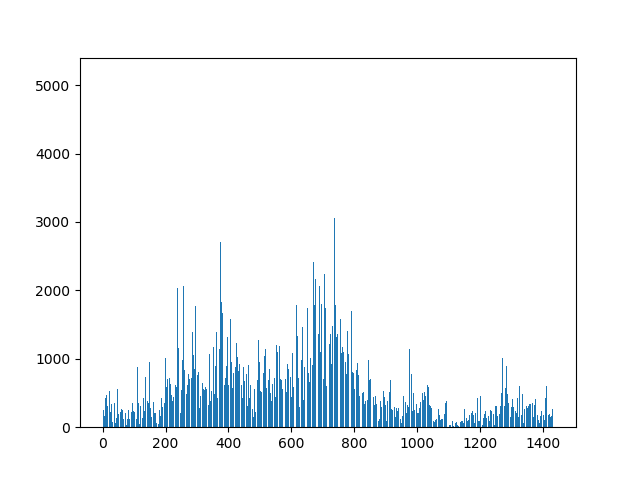

Wall time: 5.74 s


<BarContainer object of 1435 artists>

In [66]:
%%time

#Activity per minute?
activity = np.zeros(len(set(second_filter.astype('datetime64[m]'))))
index = 0
for i in set(second_filter.astype('datetime64[m]')):
    activity[index] = np.count_nonzero(rounded_timestamps==i)
    index += 1
    
plt.bar(range(0,len(set(second_filter.astype('datetime64[m]')))),tmp)

,bid,ask
date,,
2018-01-02 00:00:00.033000+00:00,1.20106,1.20110
2018-01-02 00:00:00.035000+00:00,1.20106,1.20109
2018-01-02 00:00:00.038000+00:00,1.20106,1.20110
2018-01-02 00:00:00.038000+00:00,1.20106,1.20110
2018-01-02 00:00:00.038000+00:00,1.20106,1.20109
...,...,...
2018-01-02 23:59:56.690000+00:00,1.20614,1.20618
2018-01-02 23:59:57.393000+00:00,1.20614,1.20618
2018-01-02 23:59:58.704000+00:00,1.20615,1.20618


In [ ]:
#we will now need activity per minute

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000


c:\users\karl\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Wall time: 1h 57min 18s


Text(0, 0.5, 'Price')

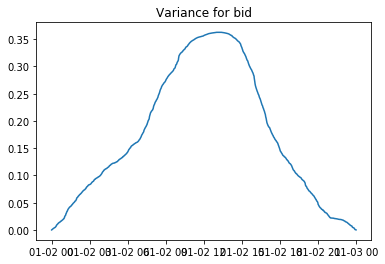

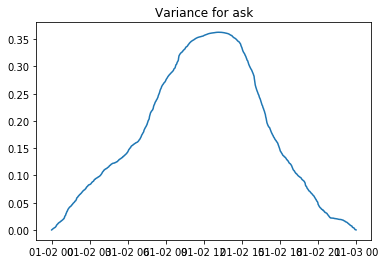

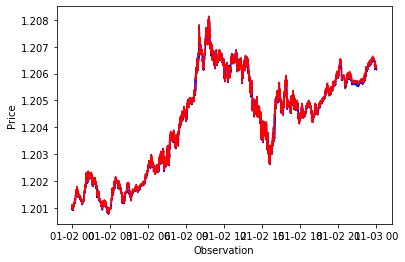

In [17]:
%%time

#this is a very costly script.. perhaps not the best..

variance_bid = np.zeros(len(bids)-1)
variance_ask = np.zeros(len(bids)-1)

bids_to_now = np.zeros(len(bids))
asks_to_now = np.zeros(len(bids))

bids_to_now[0] = bids[0]
asks_to_now[0] = asks[0]

timeaxle = ticks.index[1:len(ticks)]
timeaxle2 = ticks.index[0:len(ticks)]

for i in range(1,len(bids)-1):
    start = time.time()
    
    bids_to_now[i] = bids[i]
    asks_to_now[i] = asks[i]
    
    var1 = np.var(bids_to_now)
    var2 = np.var(asks_to_now)
    
    variance_bid[i] = var1
    variance_ask[i] = var2
    
    stop = time.time()
    if i % 10000 == 0:
        print(str(i) + ' / ' + str(len(bids)-1))
        print(stop-start)

plt.figure()
plt.plot(timeaxle,variance_bid)
plt.title('Variance for bid')

plt.figure()
plt.plot(timeaxle,variance_ask)
plt.title('Variance for ask')

plt.figure()
plt.plot(timeaxle2,bids,c='b')
plt.plot(timeaxle2,asks,c='r',ls='--')
plt.xlabel('Observation')
plt.ylabel('Price')

#plt.figure()
#plt.plot(range(0,l),bids,c='b')
#plt.plot(range(0,l),asks,c='r',ls='--')
#plt.xlabel('Observation')
#plt.ylabel('Price')

## Now we want to define high activity somehow and plot it with respect to time, so as a first test we chose to measure activity per second

In [28]:
%%time

second_filter = ticks.index[0:len(ticks)].values
test = second_filter.astype('datetime64[m]')

activity = np.zeros(len(set(test)))
timeaxle = [None]*len(set(test))
count = 0

for i in set(test):
    tmp = np.count_nonzero(test==i)
    activity[count] = tmp
    timeaxle[count] = i
    count += 1
    if count % 500 == 0:
        print(str(count) + ' / ' + str(len(set(test))))


500 / 1435
1000 / 1435
Wall time: 7.98 s


<IPython.core.display.Javascript object>


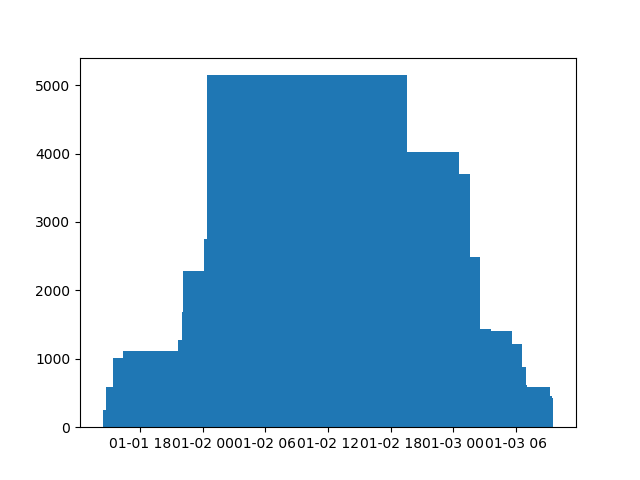

<BarContainer object of 1435 artists>

In [31]:
plt.figure()
plt.bar(timeaxle, activity)

In [59]:
np.count_nonzero(total_set[4]==3)

15447

In [ ]:
#plot for k-means clustering ver 1
plt.clf()
for i in range(0,len(dataset[0])):
    if lb[i] == 0:
        plt.scatter(dataset[0][i],dataset[1][i],c='r')
    elif lb[i] == 1:
        plt.scatter(dataset[0][i],dataset[1][i],c='b')
    elif lb[i] == 2:
        plt.scatter(dataset[0][i],dataset[1][i],c='g')

centers = Kmean.cluster_centers_
plt.scatter([centers[0][0], centers[1][0], centers[2][0]],[centers[0][1], centers[1][1], centers[2][1]], marker='+')

# plot for db_scan ver 1
plt.clf()
for i in range(0,len(dataset[0])):
    if lb_DB[i] == 0:
        plt.scatter(dataset[0][i],dataset[1][i],c='r')
    elif lb_DB[i] == 1:
        plt.scatter(dataset[0][i],dataset[1][i],c='b')
    elif lb_DB[i] == 2:
        plt.scatter(dataset[0][i],dataset[1][i],c='g')
    elif lb_DB[i] == -1:
        plt.scatter(dataset[0][i],dataset[1][i],c='y')
        
# plot for gmm ver 1
plt.clf()
for i in range(0,len(dataset[0])):
    if lb_gmm[i] == 0:
        plt.scatter(dataset[0][i],dataset[1][i],c='r')
    elif lb_gmm[i] == 1:
        plt.scatter(dataset[0][i],dataset[1][i],c='b')
    elif lb_gmm[i] == 2:
        plt.scatter(dataset[0][i],dataset[1][i],c='g')
    elif lb_gmm[i] == 3:
        plt.scatter(dataset[0][i],dataset[1][i],c='y')